In [1]:
#importing libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
import requests,json
import pickle

import os
print(os.listdir("./"))

['.DS_Store', '.git', '.ipynb_checkpoints', 'app.yaml', 'countvect', 'Email_spam_filtering.py', 'main.py', 'model_file', 'spam.csv', 'Spam_filtering.ipynb', 'vector_countvect', 'webapp']


In [2]:
#reading the dataset 

df = pd.read_csv('.//spam.csv',encoding='latin-1')
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.head(5)


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df_labels=df['v1']
df_labels.head(5)

0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object

In [4]:
#splitting the test and train data 
trainset, testset, trainlabel, testlabel = train_test_split(df, df_labels, test_size=0.33, random_state=42)

In [5]:
#extracting n-grams from the text data
countvect= CountVectorizer(ngram_range=(2,2),)
x_counts = countvect.fit(trainset.v2)
#preparing for training set
x_train_df =countvect.transform(trainset.v2)
#preparing for test set
x_test_df = countvect.transform(testset.v2)

The accuracy of the model is 97.87928221859707%
[[1581    6]
 [  33  219]]


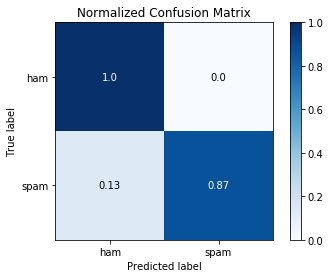

In [6]:
#Creating the model using naive bayes
clf=MultinomialNB()
clf.fit(x_train_df,trainset.v1)
predicted_values = clf.predict(x_test_df)
predictions=dict()
acurracy = accuracy_score(testset.v1,predicted_values)
predictions['Naive Bayes']=acurracy*100
confusionmatrix = confusion_matrix(testset.v1,predicted_values)
print("The accuracy of the model is {}%".format(acurracy*100 ))
print(confusionmatrix)
skplt.metrics.plot_confusion_matrix(testset.v1,predicted_values, normalize=True)
plt.show()

In [7]:
def prepareword(word):
    trans_word=countvect.transform(word)
    return trans_word

sent = ['Is there any annual fee I have to pay to Best Buy']
sent=prepareword(sent)
print(sent)
print(clf.predict(sent))

  (0, 11034)	1
  (0, 13059)	1
  (0, 25177)	1
  (0, 26178)	1
['ham']


In [8]:
#serializing the model 
pickle.dump(clf,open('model_file',"wb"))
pickle.dump(countvect,open('countvect','wb'))
print(testset.v2[[1044]])

1044    We know someone who you know that fancies you....
Name: v2, dtype: object


In [9]:
#loading the serialzied model
ser_clf = pickle.load(open('model_file','rb'))
ser_countvect =pickle.load(open('countvect','rb'))

#loading the serialized joblib model 
# ser_clf = joblib.load('model.pkl')
# ser_countvect=joblib.load('countvect.pkl')
#testing the loaded model 
word = ['green_tea']
x_count = ser_countvect.transform(word)
x_count_f=prepareword(word)

ser_clf.predict(x_count[0])

array(['ham'], dtype='<U4')

In [13]:
url= 'http://localhost:5004/api'
data = json.dumps(['Congratulations ur awarded either å£500 of CD '])
r=requests.post(url,data)
result = r.json()
print(result['results'])

spam
